## This notebook is all you need for Map Vis. using Folium. Get Ready for a Topsy Turvy Ride with Folium. 
>  by : Bhanvi Menghani

# Table of Contents
> ### [1. Scratching the surface ](#1)
> 
> > * [Basics of folium](#11)
> > * [Documentation & Basic ](#12)
> 
> ### [2. Digesting the cool features](#2)
> 
> > * [Types of Map](#21)
> > * [Mini Maps](#22)
> > * [Markers](#23)
> > * [What If You Don't Know the coordinates ?? ](#24)
> > * [Circle Marker ](#25)
> 
> ### [3. Data Driven Maps](#3)
> 
> > * [Using World Country Dataset](#31)
> 
> ### [4. Vis. that will Make you go WOW!!](#4)
>     
> > * [Plotting a Route !](#41)
> > * [Vis over popup !](#42)
> > * [Chloropeth Maps !](#43)
> > * [Overlay Maps!](#44)
> > * [Heat Map!](#45)
> 
> 
> ### [5. Resources and Recomendation](#5)
> > [My Medium Blog on Folium](#6)

# <a id="1">1. Scratching the surface</a>
# <a id="11">Folium </a>
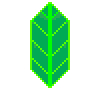
*  Python has a package called <span style="color:red">**folium**</span> which allows us to generate maps for the browser by using a <span style="color:red">**Java script library Leaflet.js**</span> which is an interactive library for maps. <br>
* But python brings together the power of data and makes the whole task easy for the programmer. Like if we have a <span style="color:red">database of location coordinates </span>we hold the data in the map and display it in browser through leaflet.

## <a id="12">Official Documentation 

In [ ]:
from IPython.display import IFrame
documentation = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
display(documentation)

In [ ]:
# Import & Install

! pip install folium  

# but its by default installed 

import folium

In [ ]:
# Fetching inbuilt doc.
folium.Map?

In [ ]:
folium.Map()

In [ ]:
#specifying start location ,zoom value,height , width and scale
m = folium.Map(location=[45.5236, -122.6750],zoom_start=12, width=1000, height=1000, control_scale=True)
m

In [ ]:
#saving Map
m.save('index.html')

# <a id="2"> 2.Digesting the cool features</a>
## <a id="21">Types of Maps avaliable</a>

In [ ]:
# start with 1 basic map
map_type = folium.Map(location=[38, -98], zoom_start=2)

# add tiles to the basic map using raster layers in folium
folium.raster_layers.TileLayer('Open Street Map').add_to(map_type)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map_type)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map_type)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map_type)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map_type)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(map_type)

# add layer control to show different maps
folium.LayerControl().add_to(map_type)

# display map
map_type

# <a id="22"> Making a Mini Map with the Map</a>

In [ ]:
# import plugind from folium
from folium import plugins

In [ ]:
# big map
big_map = folium.Map(location=(20, 78), zooom_start = 13)

# add plugin mini map
mini_map = plugins.MiniMap(toggle_display=True)

# add the mini map to the big map
big_map.add_child(mini_map)
big_map

We can also add zoom and full screen plugins to it.

# <a id="23">Markers in Folium</a>

In [ ]:
folium.Marker?

In [ ]:
m= folium.Map(location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Watercolor'
)

# Adding Marker 

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup='Timberline Lodge',
    icon=folium.Icon(color='green')
).add_to(m)
m

# <a id="24"> What If You Don't Know the coordinates ?? </a>
It is possible that a person dosen't remembers the exact latitude and longitudes of the location . There is a fix to that : USe Geo Location , which means add the address insted of coordinates. 

## GEOCODER 
It converts the address specified by us into the correct latitude and longitudes. This library had some error while working in kaggle so I switched to Google Colab
https://colab.research.google.com/drive/1NKV2dmoHGsfuyp9-wtSDhkkRy_3LvR29#scrollTo=AN3_t2Ep0g_w


In [ ]:
!pip install geocoder
import geocoder

In [ ]:
# give in the normal address we know
address = geocoder.osm('Sardar Sarovar Dam, Statue of Unity Rd, Kevadia, Gujarat 393155')

# address latitude and longitude
address_latlng = [address.lat, address.lng]

# add marker to map
folium.Marker(address_latlng, popup='Statue Of Unity', tooltip='Click Me!').add_to(m)

# display map
m

# <a id="25">Circle Marker</a>

In [ ]:
map_circle = folium.Map(location=[38, -98], zoom_start=4)

# radius of the circle in meters
folium.Circle(radius=10000, location=[38, -98], color='green').add_to(map_circle)

# circle of a fixed size with radius specified in pixels
folium.CircleMarker(location=[39, -105], radius=25, color='blue', fill_color='yellow').add_to(map_circle)

# Circle marker is pixel specific and hence dosent changes it area much while circle is meter 
#specific so it inc or dec as we zoom i nor zoom out respectively.

# display map
map_circle

# <a id="3"> 3. Data Driven Maps</a>
# <a id="31"> Dataset implemented </a>
We are using the latitude and longitude for each state and country and displaying them on map

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('../input/latitude-and-longitude-for-every-country-and-state/world_country_and_usa_states_latitude_and_longitude_values.csv')

In [ ]:
# Data Pre Processing :) (something inavitable)
data.isna().sum()

In [ ]:
# we have quite a few null values and we are not interested in us data
df = data.dropna(axis=0)

In [ ]:
df.isna().sum()

In [ ]:
place = df[ ['latitude', 'longitude'] ]

In [ ]:
type(place)

In [ ]:
# dataframe : numpy array : python list
place = place.values.tolist()

In [ ]:
type(place)

In [ ]:
map_country = folium.Map(location=[38, -98], zoom_start=4)

In [ ]:
def country(i,color):
    folium.Marker(
            location=point, 
            popup=df['country'][i],
            tooltip='Click!',
            icon=folium.Icon(color=color, icon='tint', icon_color='white' )
        ).add_to(map_country)

In [ ]:
i=0
for point in place:
    country(i,'red')
    i+=1

In [ ]:
map_country

# <a id="4">4. Vis. that will make you go WOW!!</a>
# <a id="41">  Ploting Route </a>

In [ ]:
# create map
map_plot_route = folium.Map(location=[20,50], zoom_start=4)

# added lat long to route
route_lats_longs = [[22.4707, 70.0577],    # Jamnagar
                    [26.9124, 75.7873],    # Jaipur
                    [27.1767, 78.0081],    # agara
                    [22.8046, 86.2029],    # Jamshedpur
                    [17.3850, 78.4867] ]   # Hydrabad

# Ploting the route
folium.PolyLine(route_lats_longs).add_to(map_plot_route)
map_plot_route

In [ ]:
# create map
map_plot_antroute = folium.Map(location=[20,50], zoom_start=4)

# Ploting ant-route
plugins.AntPath(route_lats_longs).add_to(map_plot_antroute)
map_plot_antroute

# <a id="42">Vis over Popups

In [ ]:
import json

In [ ]:
import os
vis = os.path.join('../input/vis-data','vis2.json')

In [ ]:
m= folium.Map(location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Watercolor'
)

folium.Marker(
    location=[45.3288, -121.6625],
    popup=folium.Popup(max_width=450).add_child(folium.Vega(json.load(open(vis)))),
    icon=folium.Icon(icon='cloud')
).add_to(m)

In [ ]:
m

# <a id="43">Chloropeth Map</a>

In [ ]:
import folium
import pandas as pd
import os
'''
# load states lat long file
# load unemployment file
states = os.path.join('input/vis-data', 'us-states.json')     # file path ../input/vis-data/us-states.json
#unemployement_data = os.path.join('input/vis-data', 'us_unemployment.csv')      #file  ../input/vis-data/us_unemployment.csv
state_data = pd.read_csv('../input/vis-data/us_unemployment.csv')
'''

url = 'https://raw.githubusercontent.com/bradtraversy/python_folium_example/master/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/us_unemployment.csv'
state_data = pd.read_csv(state_unemployment)

In [ ]:
#make a map
m = folium.Map(location=[48, -102], zoom_start=3)

# add Chloropeth feature
m.choropleth(
    geo_data=states,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate %'
)

folium.LayerControl().add_to(m)

m.save('map2.html')


# <a id="44">Overlay Maps</a>
### Overlaying involves adding a covering of something on our map. This time we add an outline of Indian peninsula. 
### Steps to overlay :
1. Head over to [geojson.io](http://geojson.io/) 
2. save json file in notepad and add to your data in kaggle
3. set file path through os module
4. Use GeoJson Function on it 

In [ ]:
import os 
import json

In [ ]:
#GEo Json data path
overlay = os.path.join('../input/vis-data', 'overlay.json')

In [ ]:
map = folium.Map(location=(25, 50), zoom_start=4)
folium.GeoJson(overlay, name='cambridge').add_to(map)

In [ ]:
map

# <a id="45">Heatmap</a>


In [ ]:
# using world latitude longitude data 
# the most important factor for a heat map is intensity which will need a different kind of dataset
data_heat = df[['latitude','longitude']].values.tolist()

In [ ]:
import folium.plugins as plugins

m = folium.Map(location=(25,70), zoom_start=4)


plugins.HeatMap(data_heat).add_to(m)

In [ ]:
m


# <a id="5"> References: </a>

 1. Official documentation : https://python-visualization.github.io/folium/
 2. GitHub Repo 1 : https://github.com/groundhogday321/python-folium
 3. GitHub Repo 2 : https://github.com/bradtraversy/python_folium_example
 4. Kaggle Kernel 1 : https://www.kaggle.com/dabaker/fancy-folium?rvi=1
 5. *** Kaggle Kernel 2 : https://www.kaggle.com/poonaml/last-cab-to-new-york-animated-heatmap-trips-folium ***
 6. Youtube Search : "Folium "
 
 
 # Recomendation / Future Work:
 
There is so much more we can do with Folium.
Given Below are a few interesting topics to make a Google search for!!
<span style="color:red">
     1. Overlaying Images
     2. Dual Maps
     3. Measure Map
     4. Heat Map with time Constrain
     5. Images / Tables / Icons as popup
     6. Chloropeth maps ( https://colab.research.google.com/drive/14lEUPAaoI_xKydV-0M29JwBs2ArZxPXN#scrollTo=R5JLuRAudQei )
    


# <a id="6"> My Blog on Folium😍 </a>
    
###  For the readers who need some brief text to get started, [here is my blog 📜on Folium](https://medium.com/image-vision/folium-all-you-need-for-map-visualization-206e88c8ac)containing the exact background you need for Folium!

# Happy Kaggling!!💻